[[{'U': [0, 0], 'D': [1, 0], 'L': [0, 0], 'R': [0, 1]}, {'U': [4, 1], 'D': [4, 1], 'L': [4, 1], 'R': [4, 1]}, {'U': [0, 2], 'D': [1, 2], 'L': [0, 1], 'R': [0, 3]}, {'U': [2, 3], 'D': [2, 3], 'L': [2, 3], 'R': [2, 3]}, {'U': [0, 4], 'D': [1, 4], 'L': [0, 3], 'R': [0, 4]}], [{'U': [0, 0], 'D': [2, 0], 'L': [1, 0], 'R': [1, 1]}, {'U': [0, 1], 'D': [2, 1], 'L': [1, 0], 'R': [1, 2]}, {'U': [0, 2], 'D': [2, 2], 'L': [1, 1], 'R': [1, 3]}, {'U': [0, 3], 'D': [2, 3], 'L': [1, 2], 'R': [1, 4]}, {'U': [0, 4], 'D': [2, 4], 'L': [1, 3], 'R': [1, 4]}], [{'U': [1, 0], 'D': [3, 0], 'L': [2, 0], 'R': [2, 1]}, {'U': [1, 1], 'D': [3, 1], 'L': [2, 0], 'R': [2, 2]}, {'U': [1, 2], 'D': [3, 2], 'L': [2, 1], 'R': [2, 3]}, {'U': [1, 3], 'D': [3, 3], 'L': [2, 2], 'R': [2, 4]}, {'U': [1, 4], 'D': [3, 4], 'L': [2, 3], 'R': [2, 4]}], [{'U': [2, 0], 'D': [4, 0], 'L': [3, 0], 'R': [3, 1]}, {'U': [2, 1], 'D': [4, 1], 'L': [3, 0], 'R': [3, 2]}, {'U': [2, 2], 'D': [4, 2], 'L': [3, 1], 'R': [3, 3]}, {'U': [2, 3], 'D': [

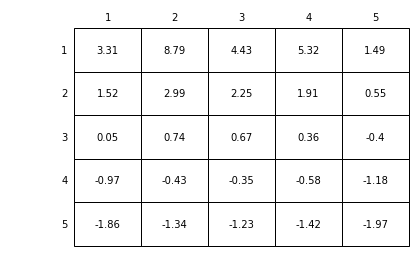

Optimal Policy


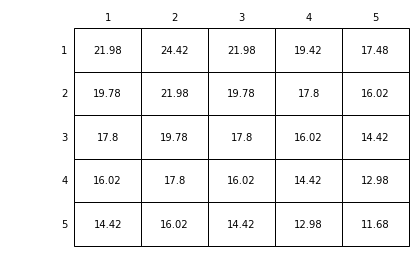

In [5]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table

WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
discount = 0.9

world = np.zeros((WORLD_SIZE, WORLD_SIZE))
# ایجاد جدول

# left, up, right, down
actions = ['L', 'U', 'R', 'D']

actionProb = []
for i in range(0, WORLD_SIZE):
    actionProb.append([])
    for j in range(0, WORLD_SIZE):
        actionProb[i].append(dict({'L':0.25, 'U':0.25, 'R':0.25, 'D':0.25}))

# print(actionProb)
nextState = []
actionReward = []
for i in range(0, WORLD_SIZE):
    nextState.append([])
    actionReward.append([])
    for j in range(0, WORLD_SIZE):
        next = dict()
        reward = dict()
        if i == 0:
            next['U'] = [i, j]
            reward['U'] = -1.0
        else:
            next['U'] = [i - 1, j]
            reward['U'] = 0.0

        if i == WORLD_SIZE - 1:
            next['D'] = [i, j]
            reward['D'] = -1.0
        else:
            next['D'] = [i + 1, j]
            reward['D'] = 0.0

        if j == 0:
            next['L'] = [i, j]
            reward['L'] = -1.0
        else:
            next['L'] = [i, j - 1]
            reward['L'] = 0.0

        if j == WORLD_SIZE - 1:
            next['R'] = [i, j]
            reward['R'] = -1.0
        else:
            next['R'] = [i, j + 1]
            reward['R'] = 0.0

        if [i, j] == A_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = A_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 10.0

        if [i, j] == B_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = B_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 5.0

        nextState[i].append(next)
        actionReward[i].append(reward)

print(nextState)

def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0,0,1,1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(image):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = 'white'

        tb.add_cell(i, j, width, height, text=val, 
                    loc='center', facecolor=color)

    # Row Labels...
    for i, label in enumerate(range(len(image))):
        tb.add_cell(i, -1, width, height, text=label+1, loc='right', 
                    edgecolor='none', facecolor='none')
    # Column Labels...
    for j, label in enumerate(range(len(image))):
        tb.add_cell(-1, j, width, height/2, text=label+1, loc='center', 
                           edgecolor='none', facecolor='none')
    ax.add_table(tb)
    plt.show()

    
# for figure 3.5
while True:
    # keep iteration until convergence
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    for i in range(0, WORLD_SIZE):
        for j in range(0, WORLD_SIZE):
            for action in actions:
                newPosition = nextState[i][j][action]
                # bellman equation
                newWorld[i, j] += actionProb[i][j][action] * (actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])
    if np.max(np.abs(world - newWorld)) < 1e-4: # اگر قدر مطلق  اختلاف درایه به درایه ماتریس کمتر از 
        print('Random Policy')
        draw_image(np.round(newWorld, decimals=2))
        break
    world = newWorld

# for figure 3.8
world = np.zeros((WORLD_SIZE, WORLD_SIZE))
while True:
    # keep iteration until convergence
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    for i in range(0, WORLD_SIZE):
        for j in range(0, WORLD_SIZE):
            values = []
            for action in actions:
                newPosition = nextState[i][j][action]
                # value iteration
                values.append(actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])
            newWorld[i][j] = np.max(values)
    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print('Optimal Policy')
        draw_image(np.round(newWorld, decimals=2))
        break
    world = newWorld
